In [1]:
#packages

import pandas as pd
import numpy as np

import plotly as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from ipywidgets import widgets

In [2]:
df = pd.read_csv('../data/cleaned_uveitis_data.csv', index_col=0)
df

gender                    race           loc          cat  \
0       Male  Black/African American      anterior  not_uveitis   
1     Female  Black/African American  intermediate   idiopathic   
2     Female                   White    panuveitis     systemic   
3     Female                   White      anterior   idiopathic   
4     Female                 unknown      anterior   idiopathic   
...      ...                     ...           ...          ...   
1070    Male                   Asian    panuveitis   infectious   
1071    Male                 unknown  intermediate   idiopathic   
1072  Female                 unknown     posterior   infectious   
1073  Female                   Asian     posterior          wds   
1074    Male                   White     posterior  not_uveitis   

       specific_diagnosis  ac_abn_od_cells  ac_abn_os_cells  vit_abn_od_cells  \
0     idiopathic_anterior              0.0              0.0               0.0   
1           pars planitis              2.0              2.0               2.0   
2                     vkh              0.5              0.5               1.0   
3     idiopathic_anterior              0.0              0.0               0.0   
4     idiopathic_anterior              0.0              0.0               0.0   
...                   ...              ...              ...               ...   
1070         tuberculosis              0.0              0.0               0.0   
1071        pars planitis              0.0              1.0               0.0   
1072        toxoplasmosis              0.0              0.0               0.0   
1073                  wds              0.0              0.0               0.0   
1074          not_uveitis              0.0              0.0               0.0   

      vit_abn_os_cells  vit_abn_od_haze  ...  anti-ccp_ab  anti-ena_screen  \
0                  0.5              0.0  ...          0.0              0.0   
1                  2.0              0.5  ...          0.0              0.0   
2                  1.0              0.0  ...          0.0              0.0   
3                  0.0              0.0  ...          0.0              0.0   
4                  0.0              0.0  ...          0.0              0.0   
...                ...              ...  ...          ...              ...   
1070               0.0              0.0  ...          0.0              0.0   
1071               2.0              0.0  ...          0.0              0.0   
1072               1.0              0.0  ...          0.0              0.0   
1073               0.0              0.0  ...          0.0              0.0   
1074               0.0              0.0  ...          0.0              0.0   

      antinuclear_antibody  complement_c3  complement_c4  \
0                      0.0          149.0           33.0   
1                      0.0          130.8           22.8   
2                      0.0          135.9           18.2   
3                      0.0          130.0           19.9   
4                      0.0          130.4           19.0   
...                    ...            ...            ...   
1070                   0.0          112.4           36.1   
1071                   0.0          121.5           22.3   
1072                   0.0          114.9           24.6   
1073                   0.0          131.0           26.0   
1074                   0.0          128.0           25.0   

      dna_double-stranded_ab  rheumatoid_factor  hbc__ab  hbs__ag  hcv__ab  
0                        0.0                0.0      0.0      0.0      0.0  
1                        0.0                0.0      0.0      0.0      0.0  
2                        0.0                0.0      0.0      0.0      0.0  
3                        0.0                0.0      0.0      0.0      0.0  
4                        1.0                0.0      0.0      0.0      0.0  
...                      ...                ...      ...      ...      ...  
1070                     0.0   

In [3]:
def df_for_column(df, column, param):
    
    df_tweaked = df[df[column] == param]
    return df_tweaked

In [4]:
column = 'cat' #use either gender, race, loc, cat or specific diagnosis
print(df[column].unique())

['not_uveitis' 'idiopathic' 'systemic' 'infectious' 'wds']


In [5]:
param = 'idiopathic' #use one of the values given by the print of above cell
df_tweaked1 = df_for_column(df, column, param) #returns a tweaked df with only values where row content of "columns" was equal to "param"

corr1 = df_tweaked1.corr() #compute correlation matrix
corr = df.corr() #compute correlation matrix

In [6]:
#%%timeit -n 10
def heatmap(corr):
    fig = ff.create_annotated_heatmap(
        z=corr.values,
        x=list(corr.columns),
        y=list(corr.index),
        annotation_text=corr.round(2).values,
        showscale=True)

    fig.update_layout(
        #title='Uveitis Correlation Data set',
        dragmode='select',
        width=1500,
        height=1500,
        hovermode='closest')

    fig.show()

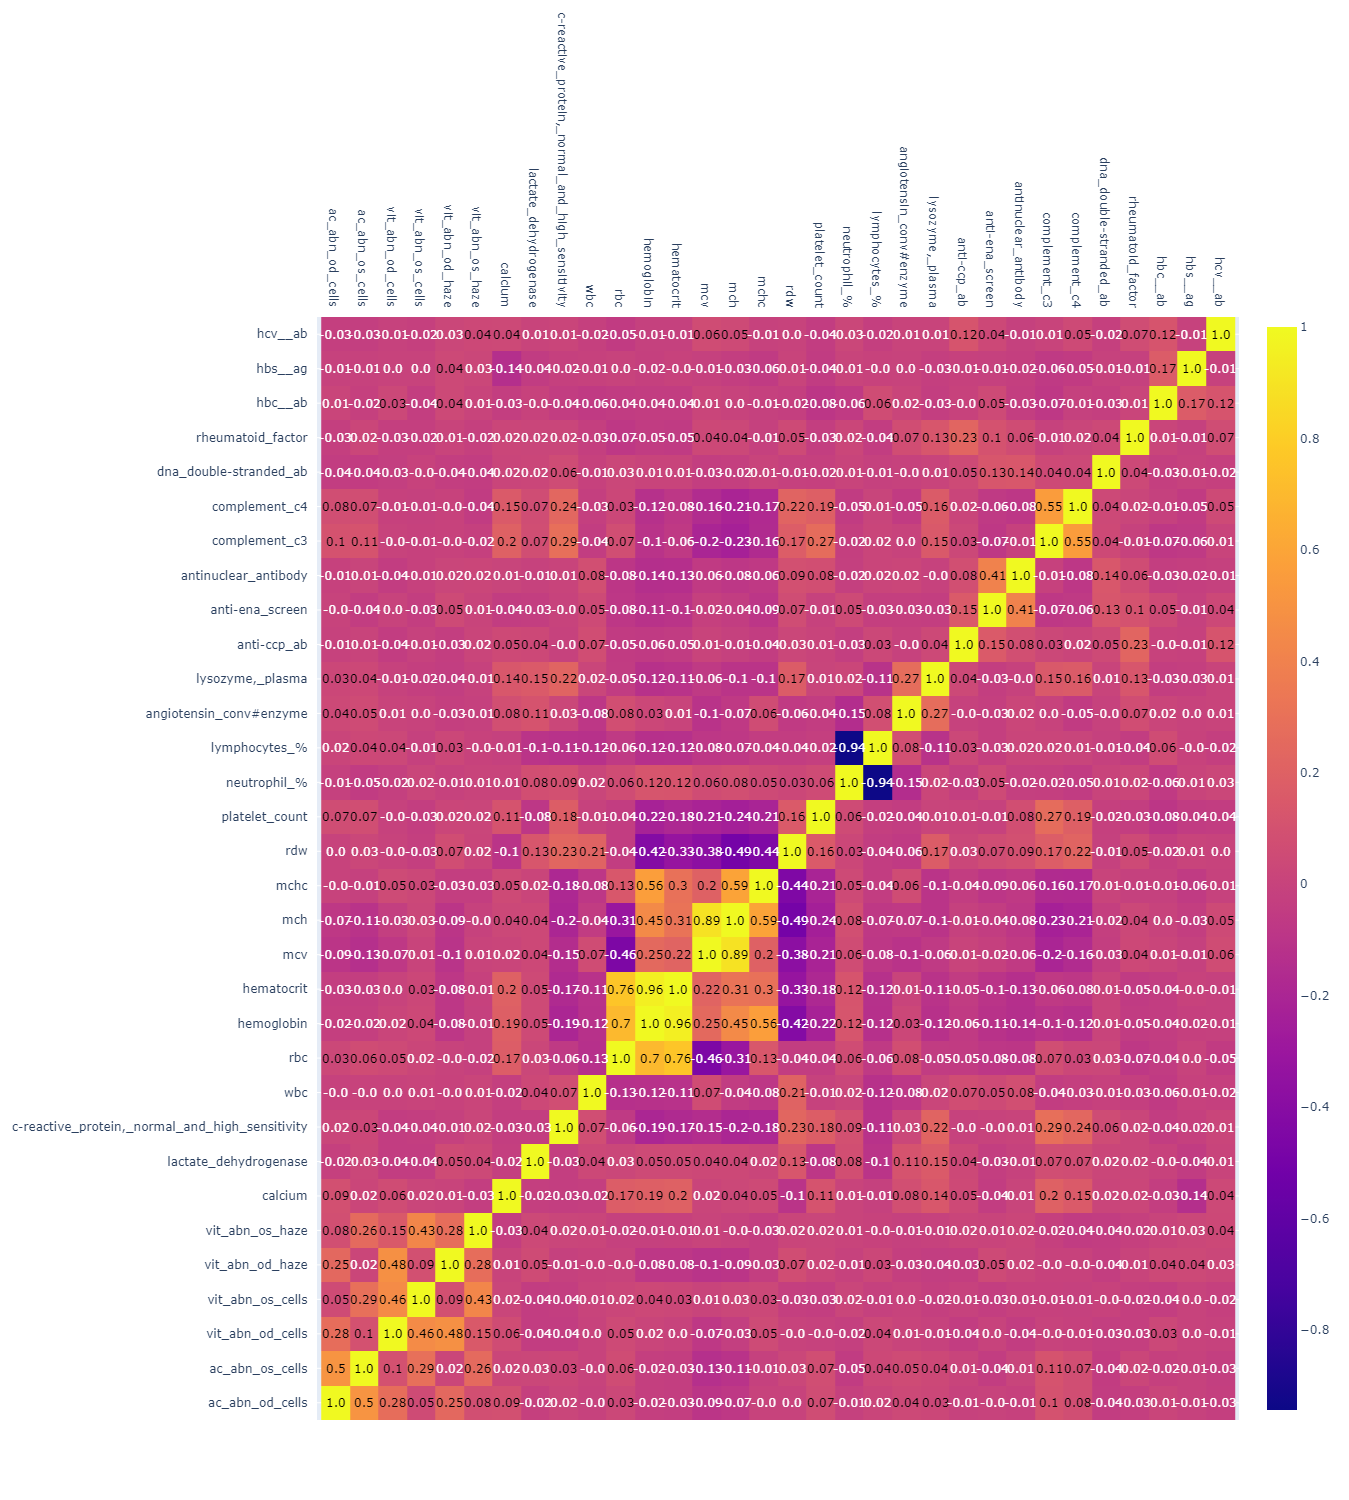

In [7]:
#correlation plot between all blood values (because corr is used). The nearer the value is to +-1 the better the correlation (meaning that the values influence/depend on each other)
heatmap(corr)

In [8]:
dimensions = []
for label, values in df.items():
    dimensions.append(dict(label = label, values = values))

In [9]:
def discrete_colors(df):
    '''Replaces distinct values in df with the same color (max 26 distinct values)'''
    df=df.copy()
    colors = px.colors.qualitative.Alphabet + px.colors.qualitative.Dark24[5:7]
    for col in df.columns:
        uniques = pd.unique(df[col])
        df[col] = df[col].replace(uniques, colors[0:len(uniques)])
    return df

In [10]:
def plot_detail_corr_2d(df):
    '''Creates a interacive Scatterplot where two columns from the dataframe can be selected and their correlation vizualized'''
    df=df.copy()
    #df.loc[df['binary diagnosis']==False, 'binary diagnosis']= "False"
    #df.loc[df['binary diagnosis']==True, 'binary diagnosis']= "True"
    df["None"] = np.zeros(len(df))
    cols1 = df.columns
    df_color = discrete_colors(df[['None','race','loc','cat','specific_diagnosis']])
    cols2 = df_color.columns

    fig = go.Figure()
    fig.add_scatter(x=df[cols1[1]], y=df[cols1[1]], mode='markers', marker = dict(opacity = 0.5, color="rgba(0,0,255,1)"))
    buttons1 = [dict(method = "restyle",
                     args = [{'y': [df[cols1[k]], 'undefined']}], 
                     label = cols1[k])   for k in range(1, len(cols1))]  

    buttons2 = [dict(method = "restyle",
                     args = [{'x': [df[cols1[k]], 'undefined']}], 
                     label = cols1[k])   for k in range(1, len(cols1))] 
    
    buttons3 = [dict(method = "restyle",
                     args = [{'marker.color': [df_color[cols2[k]], 'undefined'],
                             'text':[df[cols2[k]]]}], 
                     label = cols2[k])   for k in range(0, len(cols2))]  
    
    fig.update_layout(title_text='Detail View',
                      title_x=0.50,
                      title_font_size=20,
                      width=1000,
                      height=1000,

                      margin=dict(
                                l=50,
                                r=50,
                                b=500,
                                t=100,
                            ),
                      template="plotly_white",
                      paper_bgcolor='rgba(65,105,225,0.1)',
                      updatemenus=[dict(active=0,
                                        buttons=buttons1,
                                        x=-0.5,
                                        y=0.5,
                                        xanchor='center',
                                        yanchor='middle'),
                                   
                                   dict(buttons=buttons2,
                                        x=0.5,
                                        y=-0.5,
                                        xanchor='center',
                                        yanchor='middle'),                                  
                                   
                                   dict(buttons=buttons3,
                                        x=-0.5,
                                        y=-0.5,
                                        xanchor='center',
                                        yanchor='middle')
                                  ]); 
    
    #Add annotations for the two dropdown menus:
    fig.add_annotation(
                x=-0.5,
                y=-0.43,
                xref='paper',
                yref='paper',
                showarrow=False,
                xanchor='center',
                text="Color")
    fig.add_annotation(
                x=-0.5,
                y=0.58,
                showarrow=False,
                xref='paper',
                yref='paper',
                xanchor='center',
                text="Y-Axis")
    fig.add_annotation(
                x=0.5,
                y=-0.43,
                showarrow=False,
                xref='paper',
                yref='paper',
                xanchor='center',
                text="X-Axis");
    
    fig.show()

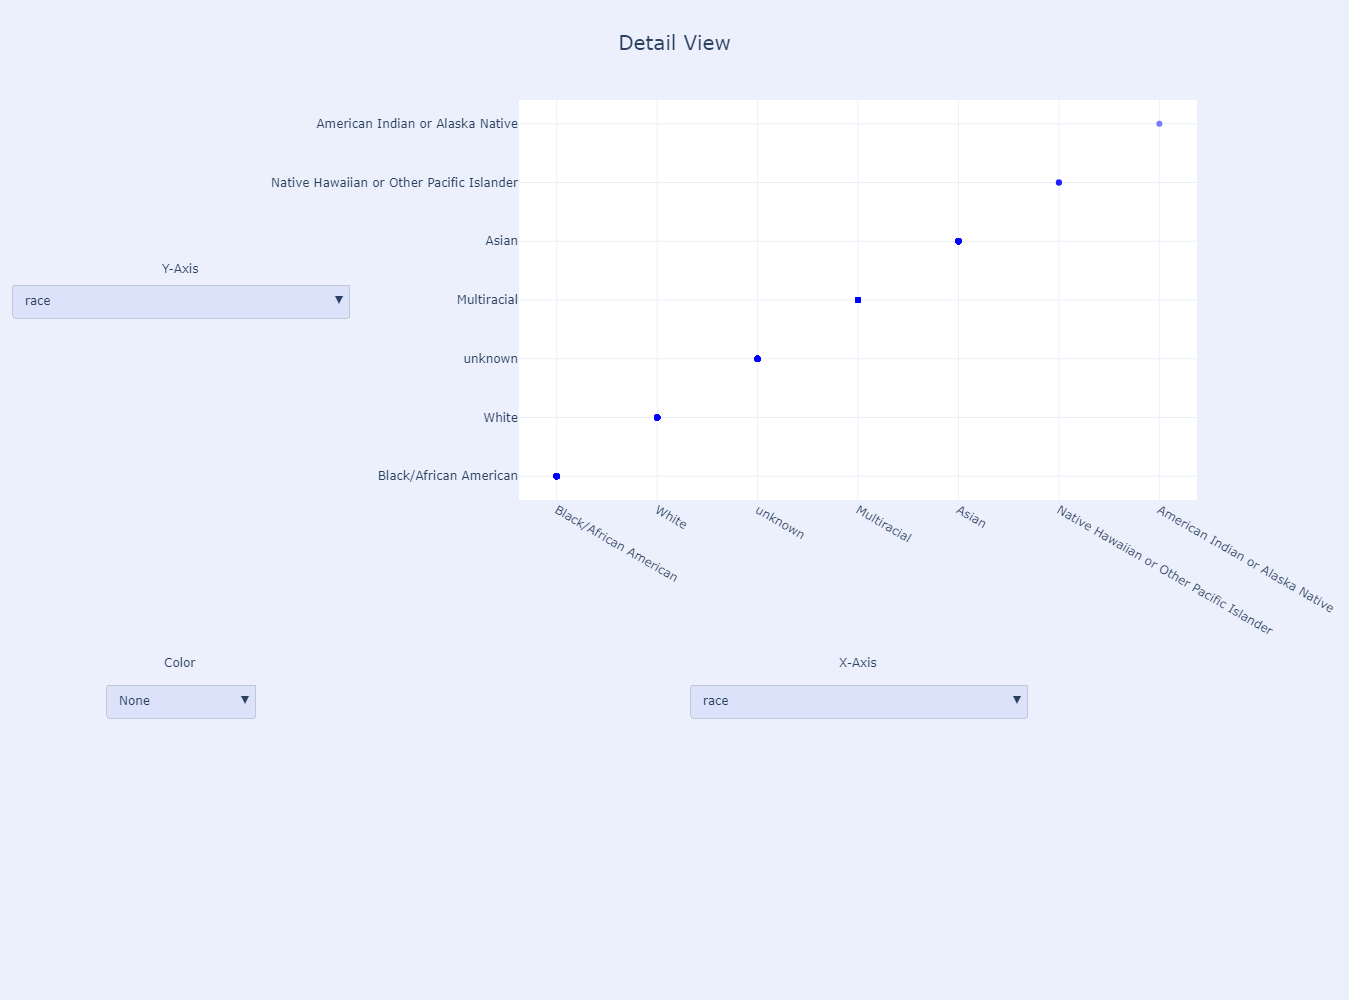

In [11]:
#%%timeit -n 10
plot_detail_corr_2d(df)